In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import nltk
%matplotlib inline
pd.options.display.mpl_style = 'default'

pd.set_option('display.max_columns', 36)
print pd.__version__

/home/hrushikesh/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


0.18.0


/home/hrushikesh/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
pd.options.display.max_columns = 200

In [4]:
import plotly.plotly as py
import plotly.graph_objs as go

In [19]:
SEED_VAL = 200
WORK_DIR = os.getcwd()
data_subset = '10Percent'
YELP_DATA_CSV_DIR = os.path.join(WORK_DIR, "data", "csv")

In [21]:
read_filename = os.path.join(YELP_DATA_CSV_DIR, 'business_review_user_'+ data_subset +'.csv')
df_data = pd.read_csv(read_filename, engine='c', encoding='utf-8')

/home/hrushikesh/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning:

Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.



In [22]:
df_data.shape

(219285, 30)

In [23]:
N_star_categories = 5
colors = np.array(['#660000', '#ff4d4d', '#ffb3b3', '#99e699', '#29a329']) # 1, 2, 3, 4, and 5 stars respectively

In [24]:
#stars_labels = np.array([x_stars+1 for x_stars in range(N_star_categories)])
stars_labels = np.array(range(N_star_categories)) + 1;
#star_category_dist_fig = plt.figure(figsize=(12,8))
bar_plot_indices = np.arange(N_star_categories) 
star_category_absolute_frequencies = df_data.review_stars.value_counts(ascending=True);
star_category_relative_frequencies = np.array(star_category_absolute_frequencies)/float(sum(star_category_absolute_frequencies))

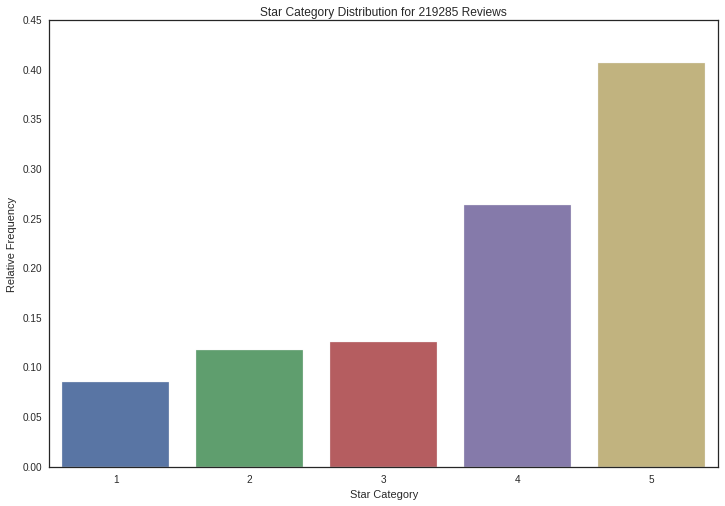

In [25]:
# Seaborn example
# fig2 = plt.figure()
sns.set()
sns.set(style="white")
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=bar_plot_indices + 1, y=star_category_relative_frequencies)
ax.set_xlabel('Star Category');
ax.set_ylabel('Relative Frequency');
ax.set_title('Star Category Distribution for {0} Reviews'.format(len(df_data)));
# py.iplot_mpl(fig2, strip_style = True)

In [26]:
from wordcloud import WordCloud

In [27]:
def plot_word_cloud(data):
    # take relative word frequencies into account, lower max_font_size
    wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(str(data))
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

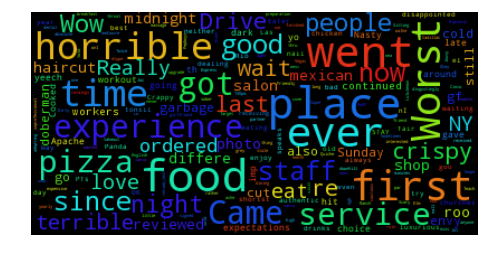

In [28]:
plot_word_cloud(df_data["review_text"].loc[df_data.review_stars == 1, ])

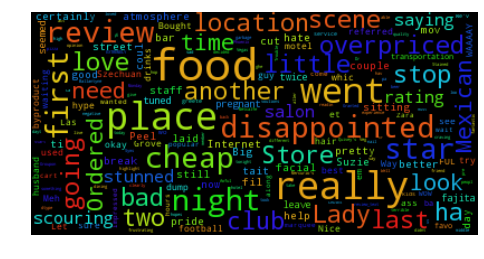

In [29]:
plot_word_cloud(df_data["review_text"].loc[df_data.review_stars == 2, ])

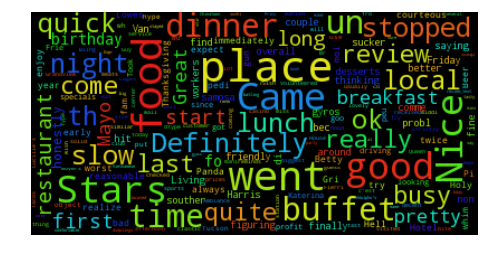

In [30]:
plot_word_cloud(df_data["review_text"].loc[df_data.review_stars == 3, ])

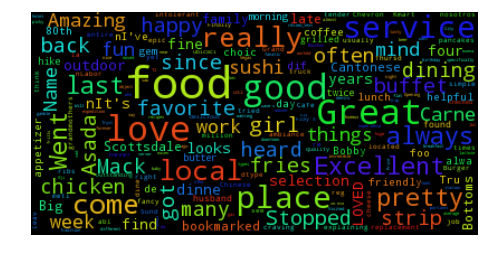

In [31]:
plot_word_cloud(df_data["review_text"].loc[df_data.review_stars == 4, ])

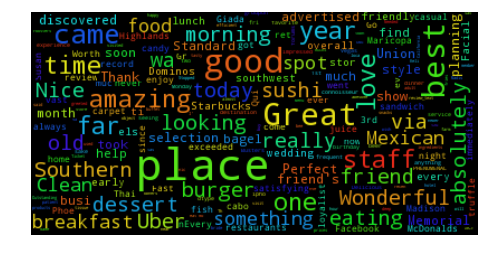

In [32]:
plot_word_cloud(df_data["review_text"].loc[df_data.review_stars == 5, ])

In [33]:
yelp_review_tokens = df_data.review_text.sum()
yelp_review_vocabulary = nltk.FreqDist(yelp_review_tokens.split())

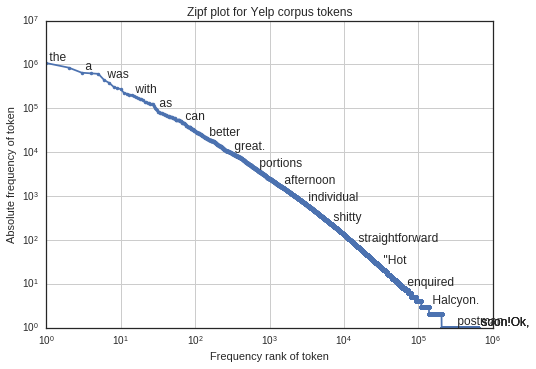

In [34]:
yelp_review_vocabulary_counts = np.array(yelp_review_vocabulary.values())
yelp_review_vocabulary_tokens = yelp_review_vocabulary.keys()

# A Zipf plot
ranks = np.arange(1, len(yelp_review_vocabulary_counts)+1)
indices = np.argsort(-yelp_review_vocabulary_counts)
frequencies = yelp_review_vocabulary_counts[indices]
plt.loglog(ranks, frequencies, marker=".")
plt.title("Zipf plot for Yelp corpus tokens")
plt.xlabel("Frequency rank of token")
plt.ylabel("Absolute frequency of token")
plt.grid(True)
for n in list(np.logspace(-0.5, np.log10(len(yelp_review_vocabulary_counts)), 20).astype(int)):
    dummy = plt.text(ranks[n-1], frequencies[n-1], " " + yelp_review_vocabulary_tokens[indices[n-1]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

# show()

In [36]:
tokens_sorted =  []
i =0;
for tok in yelp_review_vocabulary_tokens:
    tokens_sorted.append(yelp_review_vocabulary_tokens[indices[i]])
    i = i + 1

In [39]:
# Interactive plot for frequency VS rank
trace0 = go.Scatter(
    x = ranks,
    y = frequencies,
    text = tokens_sorted,
    mode='markers',
    marker=dict(size=4,
                line=dict(width=1)
               )
)

# COde for loglog plot
# layout = go.Layout(
#     title='Zipf`s plot for Yelp corpus',
#     hovermode='closest',
#     xaxis=dict(
#         title='Frequency rank of token',
#         type='log',
#         autorange=True
#     ),
#     yaxis=dict(
#         title='Absolute frequency of token',
#         type='log',
#         autorange=True
#     )
# )

layout = go.Layout(
    title='Frequency vs Rank for a sample of yelp review dataset',
    hovermode='closest',
    xaxis=dict(
        title='Rank of words',
        ticklen=5,
        zeroline=False,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Frequency of word',
        ticklen=5,
        gridwidth=2,
    ),
)
fig = go.Figure(data=[trace0], layout=layout)
py.iplot(fig, filename='Yelp word frequency vs rank')

The draw time for this plot will be slow for all clients.


/home/hrushikesh/anaconda/lib/python2.7/site-packages/plotly/plotly/plotly.py:1416: UserWarning:

Estimated Draw Time Too Long

